In [3]:
import numpy as np
import xray
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import resource
resource.setrlimit(resource.RLIMIT_NOFILE, (4096 ,4096 ))
resource.getrlimit(resource.RLIMIT_NOFILE)


(4096, 4096)

In [5]:
import xgcm
import jmd95

In [6]:
iters = range(480, 210240, 480)
ddir = '/data/scratch/rpa/SOSE/run_np240'
ds = xray.decode_cf(xgcm.open_mdsdataset(ddir, iters, prefix=['SOstt_5d',],
                             deltaT=900, ref_date='2005-01-01 00:00:00', calendar='gregorian'))
ds

xgcm/mdsxray.py:201: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
xgcm/mdsxray.py:201: UserWarning: Not sure what to do with rlev = X
  warnings.warn("Not sure what to do with rlev = " + rlev)


<xray.Dataset>
Dimensions:  (X: 2160, Xp1: 2160, Y: 320, Yp1: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 42, time: 437)
Coordinates:
  * Xp1      (Xp1) float32 5.55112e-17 0.166667 0.333333 0.5 0.666667 ...
  * Zl       (Zl) float32 0.0 -10.0 -21.0 -33.0 -46.0 -60.0 -76.0 -94.0 ...
  * Yp1      (Yp1) float32 -77.9583 -77.7916 -77.625 -77.4583 -77.2916 ...
  * Zp1      (Zp1) float32 0.0 -10.0 -21.0 -33.0 -46.0 -60.0 -76.0 -94.0 ...
  * Y        (Y) float32 -77.875 -77.7083 -77.5416 -77.375 -77.2083 -77.0416 ...
  * X        (X) float32 0.0833333 0.25 0.416667 0.583333 0.75 0.916667 ...
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 -53.0 -68.0 -85.0 -104.0 ...
  * Zu       (Zu) float32 -10.0 -21.0 -33.0 -46.0 -60.0 -76.0 -94.0 -114.0 ...
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 2005-01-16 ...
Data variables:
    YC       (Y, X) float32 -77.875 -77.875 -77.875 -77.875 -77.875 -77.875 ...
    YG       (Yp1, Xp1) float32 -77.9583 -77.9583 -77.9583 -77.9583 -77.9583 ...
    rA       

In [26]:
points = [
    ('Eastern Weddell', 335, -70),
    ('Western Weddell', 305, -70),
    ('Northern Weddell', 320, -62),
    ('East Antarctic Peninsula', 289, -66),
    ('Amundsen Sea', 240, -72),
    ('Eastern Ross', 210, -75),
    ('Western Ross', 180, -75),
    ('Wilkes Land', 100, -64)
]
reg_names, x_pts, y_pts = zip(*points)

## $\Theta$ / $S$ / $\sigma_0$ Timeseries at Select Points ## 

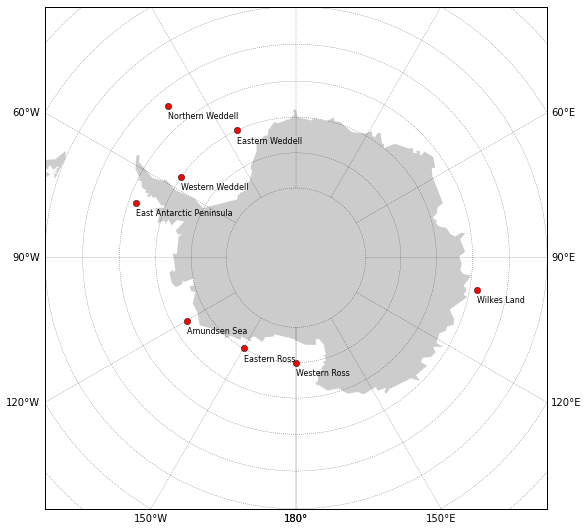

In [28]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

labels=[1,1,0,1]
lw = 0.25
m = Basemap(projection='spstere',boundinglat=-55,lon_0=180, ax=ax)
#m.drawcoastlines()
m.fillcontinents(color='0.8',lake_color='0.75')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,5.), linewidth=lw)

m.drawmeridians(np.arange(-180.,181.,30.), labels=labels, linewidth=lw)
m.drawmapboundary(fill_color='w')

for name, lon, lat in points:
    x,y = m(lon,lat)
    m.plot(x,y, 'ro')
    ax.text(x,y + 2e5,name, fontsize=8)

plt.title('Timeseries Points')

In [29]:
ds_pts = ds.sel_points(X=x_pts, Y=y_pts, method='nearest')
ds_pts

<xray.Dataset>
Dimensions:  (Xp1: 2160, Yp1: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 41, points: 8, time: 437)
Coordinates:
  * Xp1      (Xp1) >f4 5.55112e-17 0.166667 0.333333 0.5 0.666667 0.833333 ...
  * Zl       (Zl) >f4 0.0 -10.0 -21.0 -33.0 -46.0 -60.0 -76.0 -94.0 -114.0 ...
  * Yp1      (Yp1) >f4 -77.9583 -77.7916 -77.625 -77.4583 -77.2916 -77.125 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -21.0 -33.0 -46.0 -60.0 -76.0 -94.0 -114.0 ...
  * Z        (Z) >f4 -5.0 -15.5 -27.0 -39.5 -53.0 -68.0 -85.0 -104.0 -125.5 ...
  * Zu       (Zu) >f4 -15.5 -27.0 -39.5 -53.0 -68.0 -85.0 -104.0 -125.5 ...
  * time     (time) int64 432000 864000 1296000 1728000 2160000 2592000 ...
    X        (points) float32 334.917 304.917 319.917 288.917 239.917 ...
    Y        (points) float32 -70.0416 -70.0416 -62.0416 -66.0416 -72.0416 ...
  * points   (points) int64 0 1 2 3 4 5 6 7
Data variables:
    YG       (Yp1, Xp1) >f4 -77.9583 -77.9583 -77.9583 -77.9583 -77.9583 ...
    XG       (Yp1, Xp1) >f4 5.55112e-17 0.16

In [30]:
%time S = ds_pts['SALT'].load()
%time T = ds_pts['THETA'].load()

CPU times: user 5.76 s, sys: 50 s, total: 55.8 s
Wall time: 50min 49s
CPU times: user 6.75 s, sys: 58.1 s, total: 1min 4s
Wall time: 1h 17min 48s


In [31]:
import jmd95
prho, _, _ = jmd95.eos(0., T.values.ravel(), S.values.ravel())
prho.shape = T.shape
prho = xray.DataArray(prho-1000., coords=T.coords, attrs=T.attrs)

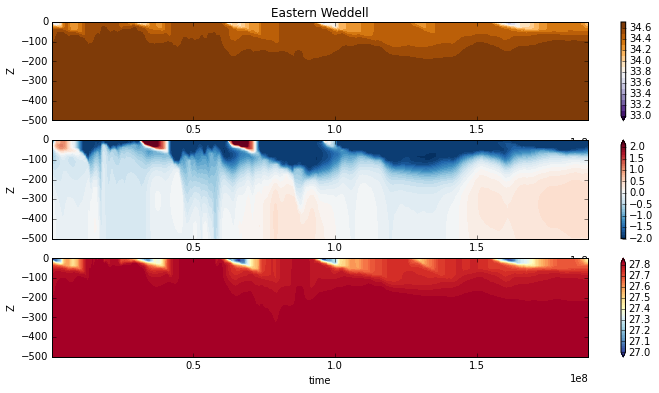

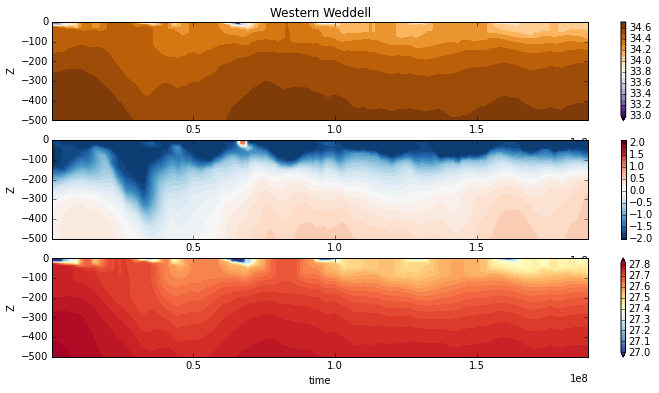

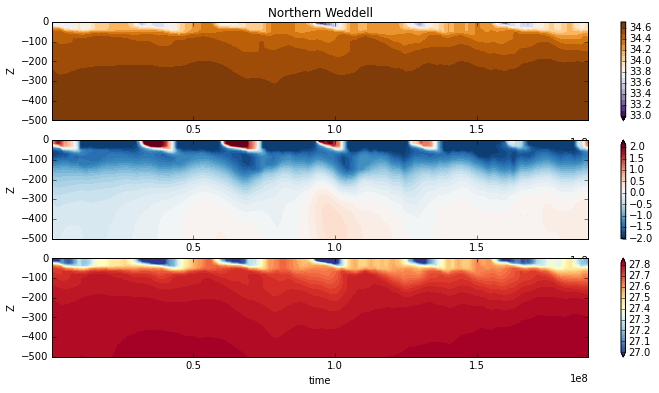

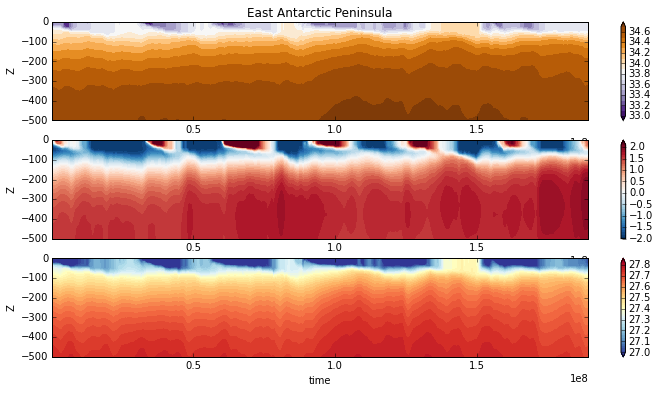

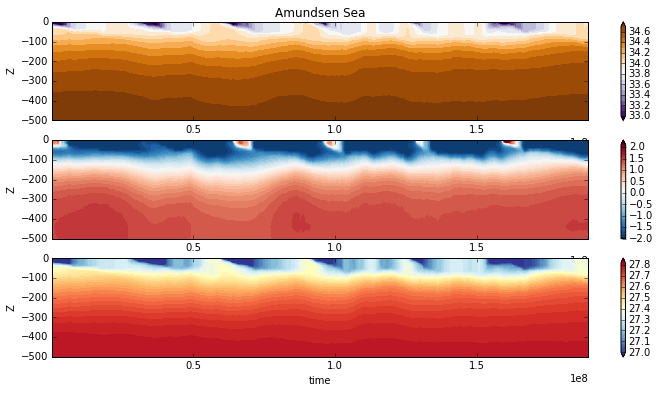

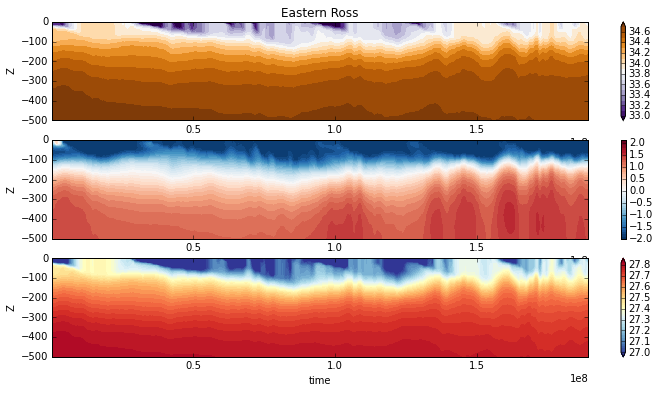

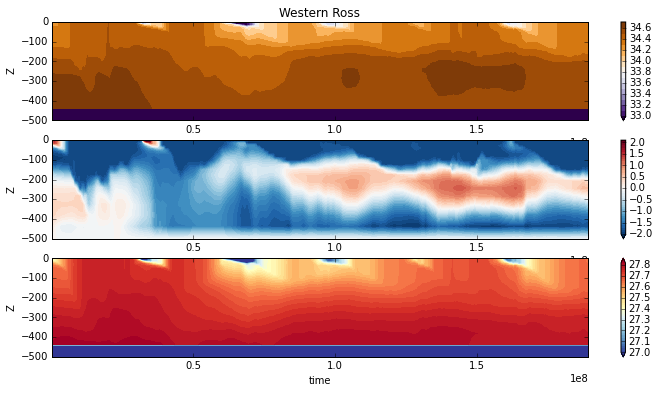

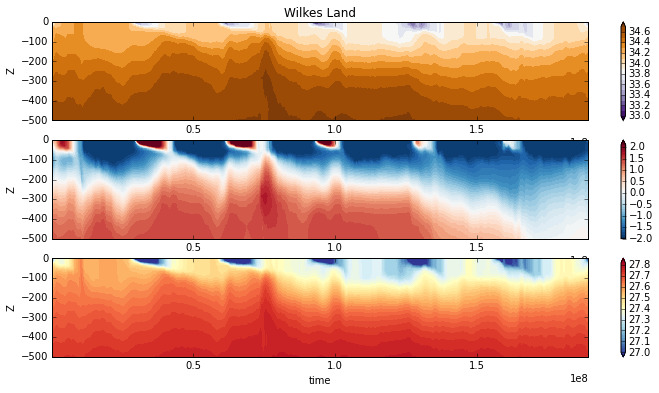

In [32]:
Slevs = np.arange(33,34.7,0.1)
Tlevs = np.arange(-2.0,2.2, 0.1)
Rholevs = np.arange(27,27.82,0.02)
for n, (pt_name, lon, lat) in enumerate(points):
    plt.figure(figsize=(12,6))
    plt.subplot(311)
    xray.plot.contourf(S[n].T, levels=Slevs, cmap='PuOr_r')
    plt.ylim([-500,0])
    plt.title(pt_name)
    plt.subplot(312)
    xray.plot.contourf(T[n].T, levels=Tlevs, cmap='RdBu_r')
    plt.ylim([-500,0])
    plt.subplot(313)
    xray.plot.contourf(prho[n].T, levels=Rholevs, cmap='RdYlBu_r')
    plt.ylim([-500,0])

In [22]:
# we want August
nt = np.int(8 * 31 / 5.)
# 5 deg. west
ds_sec = ds.sel(X=0, method='nearest').sel(Xp1=5, time='2007-08-15', method='nearest')
ds_sec = ds_sec.sel(Z=slice(0,-1000), Zp1=slice(0,-1000), Zu=slice(0,-1000))
#ds_sec

In [23]:
T_sec = ds_sec['THETA']
S_sec = ds_sec['SALT']

prho, _, _ = jmd95.eos(0., T_sec.values.ravel(), S_sec.values.ravel())
prho.shape = T_sec.shape
prho_sec = xray.DataArray(prho-1000., name=r'$\sigma_0$',
                          coords=T_sec.coords, attrs=T_sec.attrs)

hfacc = ds_sec['HFacC'].values
mask = np.ones_like(hfacc)
mask[hfacc==0.0] = np.nan
mask_sec = xray.DataArray( mask, coords=T_sec.coords)

T_sec *= mask
S_sec *= mask
prho_sec *= mask



## Gordon and Huber Section ##

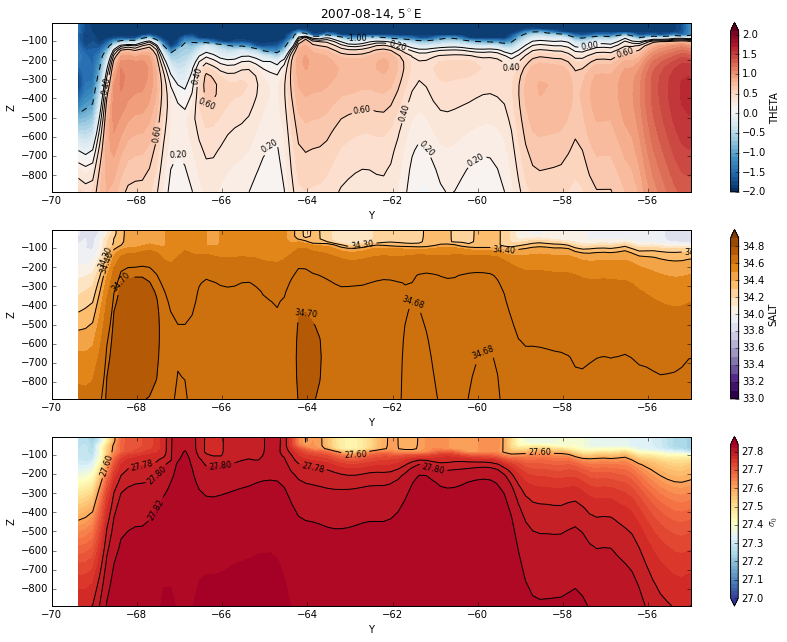

In [25]:
Slevs = np.arange(33,35,0.1)
Tlevs = np.arange(-2.0,2.2, 0.1)
Rholevs = np.arange(27,27.85,0.02)
S0 = [34.3, 34.4, 34.68, 34.7]
T0 = [-1.0, 0.0, 0.2, 0.4, 0.6]
R0 = [27.60, 27.78, 27.80, 27.82]
fmt = '%4.2f'
clabel_kwargs = dict(fmt=fmt, inline_spacing=0, fontsize=8)

date = xray.core.formatting.format_item(T_sec.time.values)

plt.figure(figsize=(12,9))
plt.subplot(311)
xray.plot.contourf(T_sec, levels=Tlevs, cmap='RdBu_r')
plt.xlim([-70, -55])
con = xray.plot.contour(T_sec, levels=T0, colors='k', add_colorbar=False)
plt.clabel(con, **clabel_kwargs)
plt.title('%s, 5$^\circ$E' % date)

plt.subplot(312)
xray.plot.contourf(S_sec, levels=Slevs, cmap='PuOr_r')
plt.xlim([-70, -55])
con = xray.plot.contour(S_sec, levels=S0, colors='k', add_colorbar=False)
plt.clabel(con, **clabel_kwargs)
plt.title('')

plt.subplot(313)
xray.plot.contourf(prho_sec, levels=Rholevs, cmap='RdYlBu_r')
plt.xlim([-70, -55])
con=xray.plot.contour(prho_sec, levels=R0, colors='k', add_colorbar=False)
plt.clabel(con, **clabel_kwargs)
plt.title('')
plt.tight_layout()

plt.savefig('figures/GH_section-%s.pdf' % date)

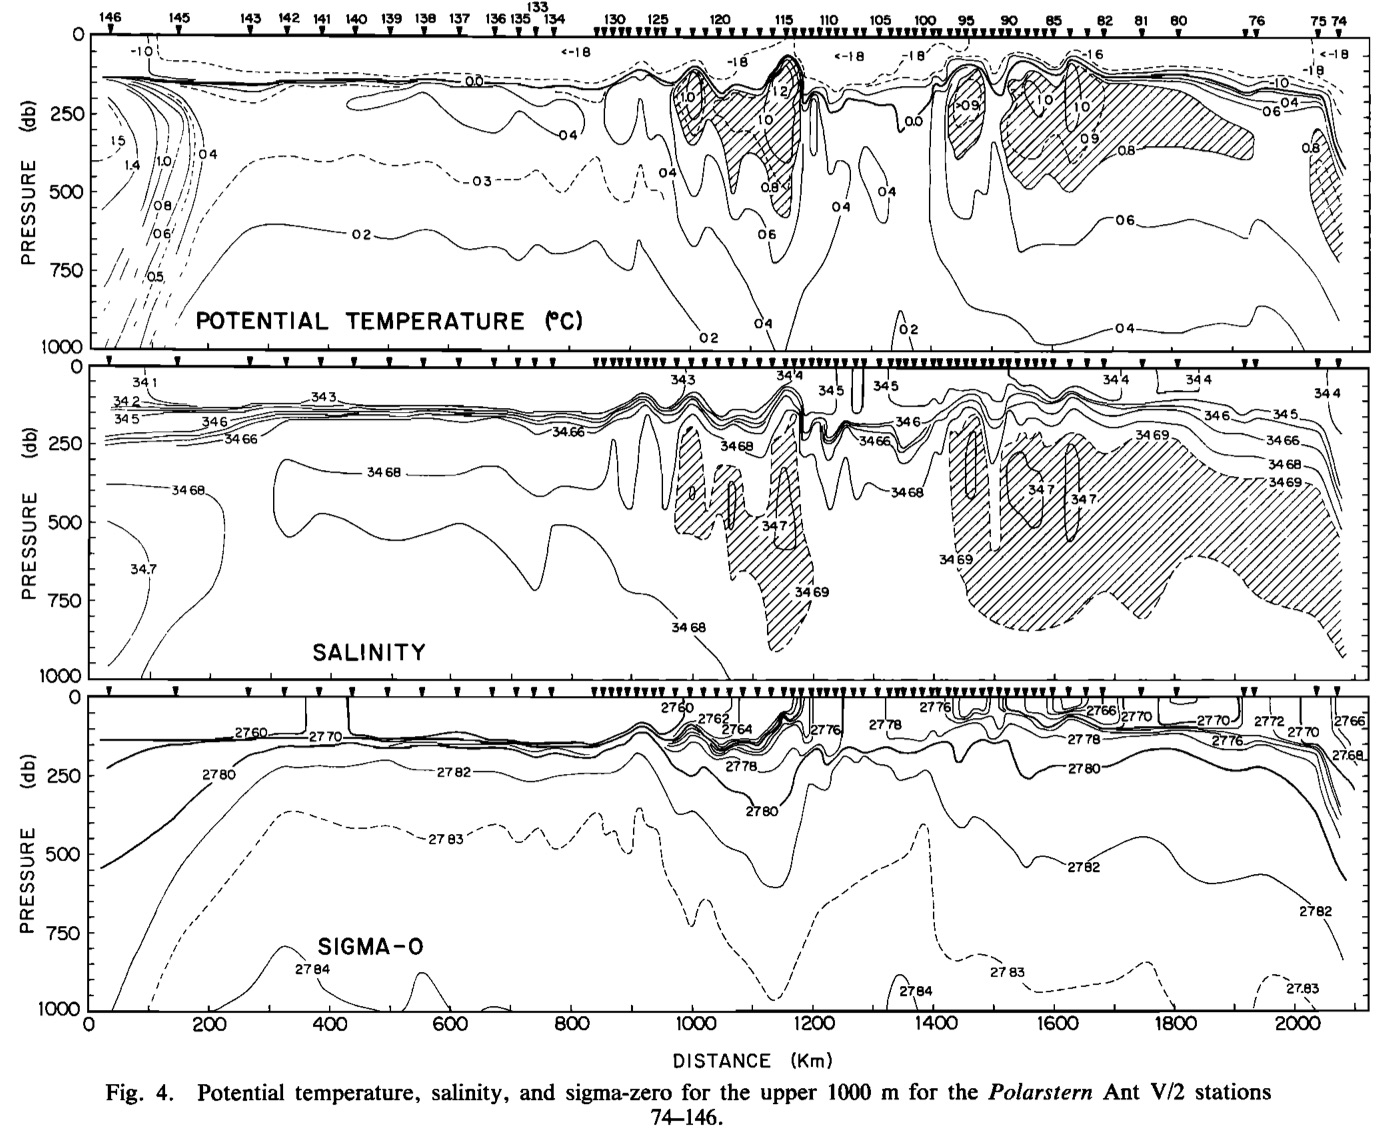

In [12]:
from IPython import display
display.Image('GordonHuber1990_section.jpg', width=800)